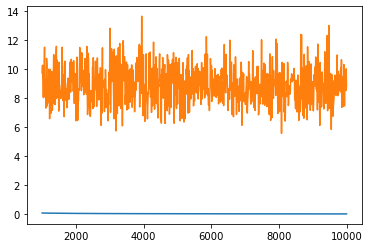

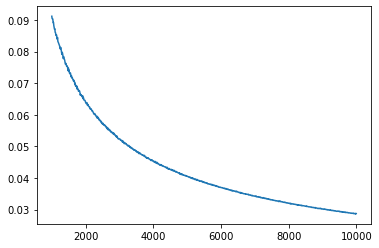

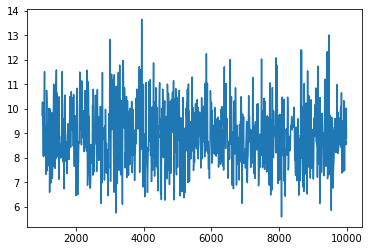

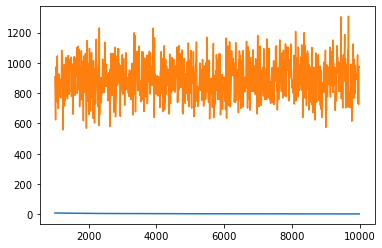

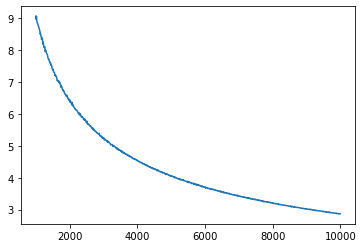

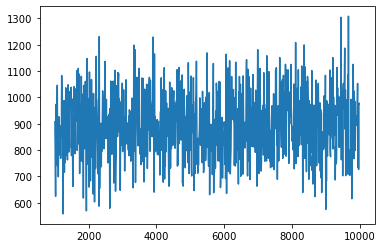

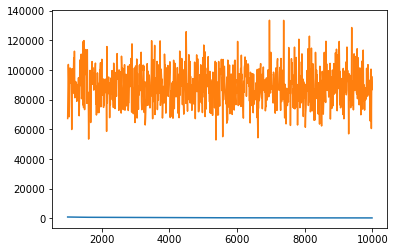

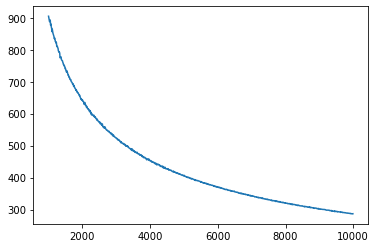

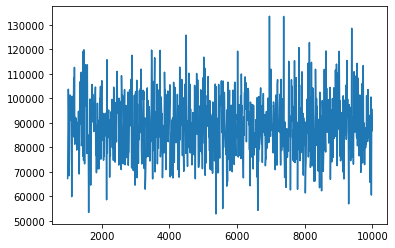

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, norm

def get_length_for_a(gamma, n, selection):
    left_quantile = chi2.ppf((1 + gamma) / 2, n)
    right_quantile = chi2.ppf((1 - gamma) / 2, n)
    sum_squares = selection.T.dot(selection)
    left = sum_squares / left_quantile
    right = sum_squares / right_quantile
    return right - left

def get_length_for_b(gamma, n, selection):
    left_quantile = norm.ppf((3 + gamma) / 4)
    right_quantile = norm.ppf((3 - gamma) / 4)
    s = np.sum(selection)
    left = (s ** 2 / n) / (left_quantile ** 2)
    right = (s ** 2 / n) / (right_quantile ** 2)
    return right - left

def check_and_plot(gamma, l, r, sigma):
    a = []
    b = []
    xs = list(range(l, r, 10))
    for i in xs:
        sum_a = 0
        sum_b = 0
        for _ in range(100):
            selection = np.random.normal(loc=0.0, scale=sigma, size=i)
            sum_a += get_length_for_a(gamma, i, selection)
            sum_b += get_length_for_b(gamma, i, selection)
        a.append(sum_a / 100)
        b.append(sum_b / 100)

    plt.plot(xs, a)
    plt.plot(xs, b)
    plt.show()

    plt.plot(xs, a)
    plt.show()

    plt.plot(xs, b)
    plt.show()

check_and_plot(0.2, 1000, 10000, 2)
check_and_plot(0.2, 1000, 10000, 20)
check_and_plot(0.2, 1000, 10000, 200)